# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
import pickle
from scipy import stats
import seaborn as sns
import math 
import random
from sqlalchemy import create_engine
import datetime
from sklearn.linear_model import LinearRegression
import patsy

In [2]:
df = pd.read_csv('Web_Scraping_Amazon.csv',sep=';')
df.head(2)

,Brand,Standing screen display size,Processor Brand,Processor Speed,RAM Size,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Operating System,Item Weight,Price
0,Apple,13.3,Intel,2.3,8,128,SSD,Intel,macOS,1.37,5827.6515
1,Apple,13.3,Intel,1.8,8,128,FlashStorage,Intel,macOS,1.34,3910.3890


In [3]:
df.tail()

,Brand,Standing screen display size,Processor Brand,Processor Speed,RAM Size,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Operating System,Item Weight,Price
1741,?Microsoft,13,?AMD,?1.8,?16,?256,?SSD,?AMD,?Windows10Pro,1.70,4842.91
1742,?HP,14,?Intel,?1.8,?16,?512,?SSD,?Intel,?Windows10Pro,1.70,6222.22
1743,?HP,15.6,?Intel,?1.8,?16,?512,?SSD,?Intel,?Windows10Pro,9.03,6411.22
1744,?HP,15.6,?AMD,?2,?16,?256,?SSD,?AMD,?Windows10Pro,1.81,4442.91
1745,?HP,13,?AMD,?1.8,?16,?256,?SSD,?AMD,?Windows10Pro,1.70,4842.91


In [4]:
df.sample(5)

,Brand,Standing screen display size,Processor Brand,Processor Speed,RAM Size,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Operating System,Item Weight,Price
552,Dell,17.3,Intel,2.8,16,256,SSD,Nvidia,Windows10,4.42,11740.6500
0,Apple,13.3,Intel,2.3,8,128,SSD,Intel,macOS,1.37,5827.6515
1249,Dell,15.6,Intel,1.6,4,500,HDD,Intel,Linux,2.20,1409.4000
316,HP,13.3,Intel,1.8,16,1000,SSD,Intel,Windows10,1.29,10653.1500
485,Lenovo,14,Intel,1.6,8,256,SSD,Intel,Windows10,1.75,4563.1500


In [5]:
df.shape

(1746, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         1746 non-null   object 
 1   Standing screen display size  1746 non-null   object 
 2   Processor Brand               1746 non-null   object 
 3   Processor Speed               1736 non-null   object 
 4   RAM Size                      1746 non-null   object 
 5   Hard Drive Size               1745 non-null   object 
 6   Hard Disk Description         1746 non-null   object 
 7   Graphics Chipset Brand        1744 non-null   object 
 8   Operating System              1746 non-null   object 
 9   Item Weight                   1746 non-null   float64
 10  Price                         1746 non-null   float64
dtypes: float64(2), object(9)
memory usage: 150.2+ KB


In [7]:
df.columns = [column.strip() for column in df.columns]

In [8]:
df=df.drop_duplicates(subset=['Brand', 'Standing screen display size', 'Processor Brand','Processor Speed', 'RAM Size', 'Hard Drive Size','Hard Disk Description', 'Graphics Chipset Brand', 'Operating System','Item Weight', 'Price'])

In [9]:
df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)


NumExpr defaulting to 8 threads.


In [10]:
df.reset_index(drop=True ,inplace=True)

In [11]:
for i in range(1681):
    df['Brand'].iloc[i]=df['Brand'].iloc[i].strip('?')
    df['Processor Brand'].iloc[i]=df['Processor Brand'].iloc[i].strip('?')
    df['Standing screen display size'].iloc[i]=float(df['Standing screen display size'].iloc[i].strip('?'))
    df['Processor Speed'].iloc[i]=float(df['Processor Speed'].iloc[i].strip('?'))
    df['RAM Size'].iloc[i]=float(df['RAM Size'].iloc[i].strip('?'))
    df['Hard Drive Size'].iloc[i]=float(df['Hard Drive Size'].iloc[i].strip('?'))
    df['Hard Disk Description'].iloc[i]=df['Hard Disk Description'].iloc[i].strip('?')
    df['Hard Disk Description'].iloc[i]=df['Hard Disk Description'].iloc[i].strip()
    df['Graphics Chipset Brand'].iloc[i]=df['Graphics Chipset Brand'].iloc[i].strip('?')
    df['Operating System'].iloc[i]=df['Operating System'].iloc[i].strip('?')
df['Standing screen display size']=df['Standing screen display size'].astype(float)
df['Processor Speed']=df['Processor Speed'].astype(float)

print('Done converting')


C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


Done converting


In [12]:
for i in range(1469):
    if(len(df['Hard Disk Description'].iloc[i])==5):
        print(df['Hard Disk Description'].iloc[i],i)

In [13]:
df['Hard Disk Description'].value_counts()

SSD             1187
HDD              372
FlashStorage      68
Emmc              19
SSHD              18
Hybrid             8
Flashmemory        4
HybridDrive        4
SATA               1
Name: Hard Disk Description, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Brand                         1681 non-null   object 
 1   Standing screen display size  1681 non-null   float64
 2   Processor Brand               1681 non-null   object 
 3   Processor Speed               1681 non-null   float64
 4   RAM Size                      1681 non-null   object 
 5   Hard Drive Size               1681 non-null   object 
 6   Hard Disk Description         1681 non-null   object 
 7   Graphics Chipset Brand        1681 non-null   object 
 8   Operating System              1681 non-null   object 
 9   Item Weight                   1681 non-null   float64
 10  Price                         1681 non-null   float64
dtypes: float64(4), object(7)
memory usage: 144.6+ KB


In [15]:
df['Brand'].value_counts()

HP              417
Lenovo          409
Dell            292
Asus            251
Acer            101
MSI              54
Toshiba          48
Oemgenuine       29
Apple            21
Microsoft        12
Samsung           8
Mediacom          7
Razer             7
Xiaomi            4
Chuwi             3
Google            3
LG                3
Fujitsu           3
Vero              3
Huawei            2
SHOXLAB           2
LenovoLaptop      1
Basrdis           1
Name: Brand, dtype: int64

In [16]:
df.tail()

,Brand,Standing screen display size,Processor Brand,Processor Speed,RAM Size,Hard Drive Size,Hard Disk Description,Graphics Chipset Brand,Operating System,Item Weight,Price
1676,Microsoft,13.0,AMD,1.8,16,256,SSD,AMD,Windows10Pro,1.70,4842.91
1677,HP,14.0,Intel,1.8,16,512,SSD,Intel,Windows10Pro,1.70,6222.22
1678,HP,15.6,Intel,1.8,16,512,SSD,Intel,Windows10Pro,9.03,6411.22
1679,HP,15.6,AMD,2.0,16,256,SSD,AMD,Windows10Pro,1.81,4442.91
1680,HP,13.0,AMD,1.8,16,256,SSD,AMD,Windows10Pro,1.70,4842.91


In [17]:
df.shape

(1681, 11)

In [19]:
mean_Brand_Price=round(df.groupby('Brand').mean())\
.sort_values('Price',ascending=False)\
.reset_index()

mean_Brand_Price.head()


,Brand,Standing screen display size,Processor Speed,Item Weight,Price
0,Razer,15.0,3.0,2.0,14556.0
1,LG,15.0,2.0,1.0,9131.0
2,Oemgenuine,15.0,2.0,2.0,8726.0
3,MSI,16.0,3.0,3.0,7521.0
4,Google,12.0,1.0,1.0,7298.0


# Visualization

<AxesSubplot:xlabel='Brand', ylabel='Price'>

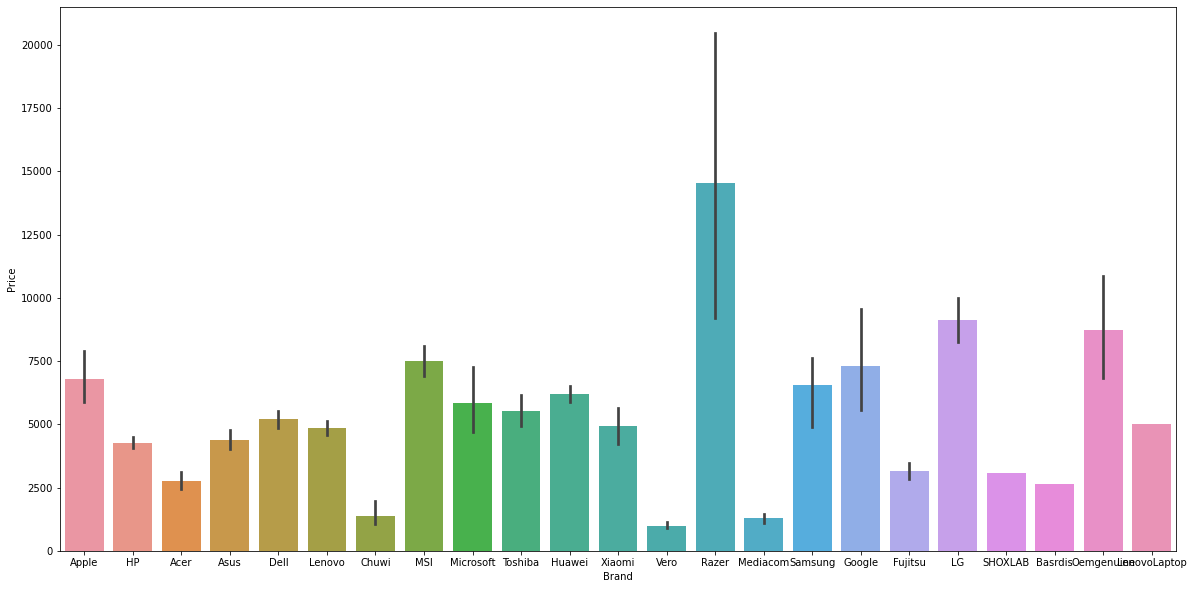

In [20]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Brand',y='Price',data=df)

C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

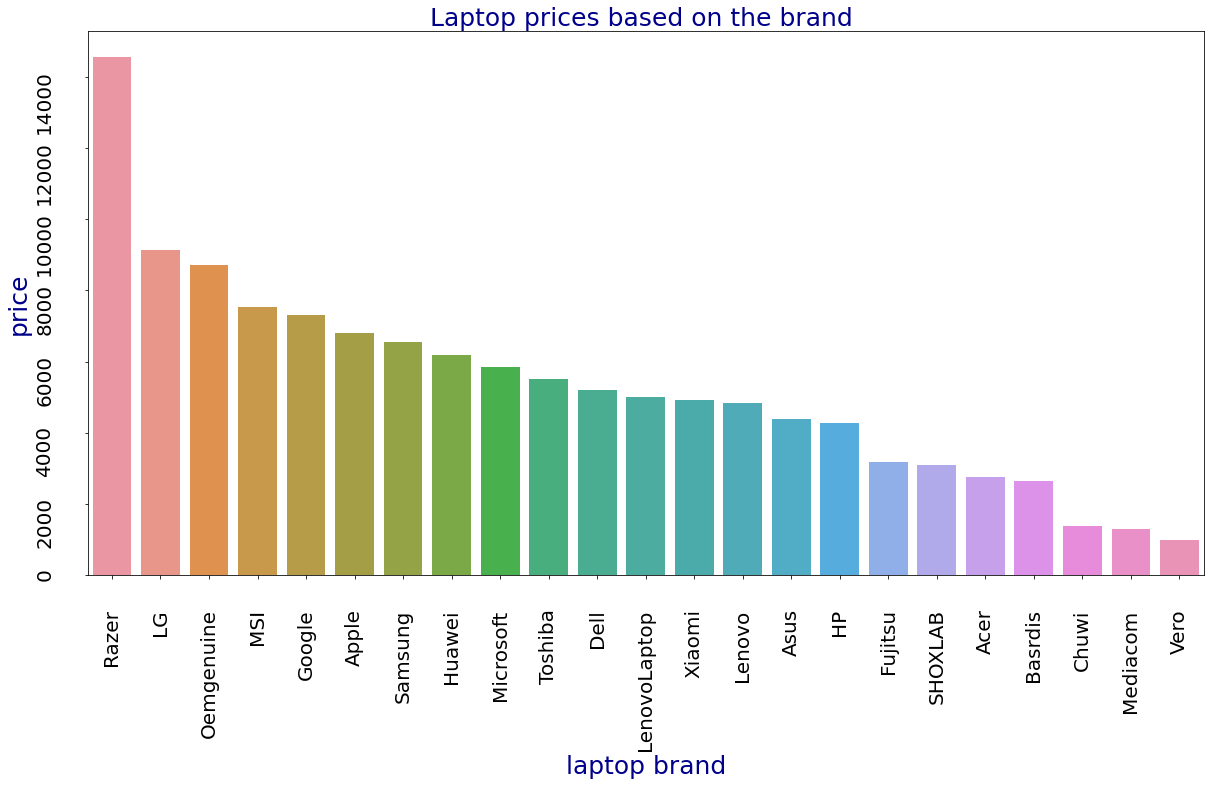

In [21]:
plt.subplots(figsize=(20,10))
bar1_plot=sns.barplot(mean_Brand_Price['Brand'],mean_Brand_Price['Price'])
bar1_plot.tick_params(pad=30,labelsize=20,rotation=90)
bar1_plot.set_xlabel('laptop brand',size=25,c='darkblue')
bar1_plot.set_ylabel('price',size=25,c='darkblue')
bar1_plot.set_title('Laptop prices based on the brand ',size=25,c='darkblue')
;

<AxesSubplot:xlabel='Graphics Chipset Brand', ylabel='Price'>

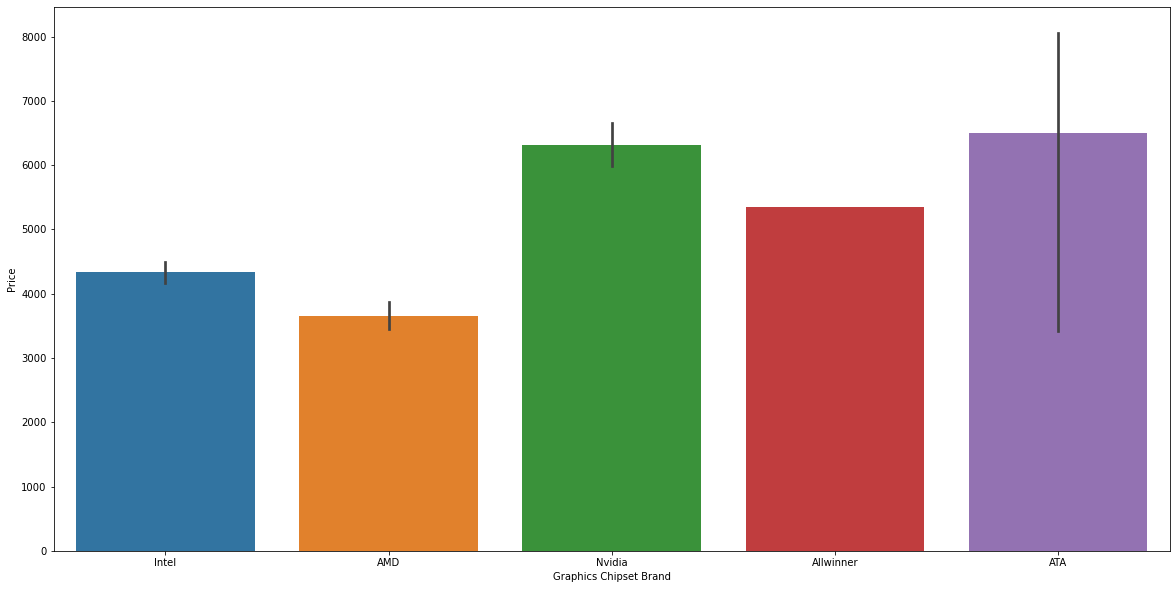

In [22]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Graphics Chipset Brand',y='Price',data=df)

<AxesSubplot:xlabel='Standing screen display size', ylabel='Price'>

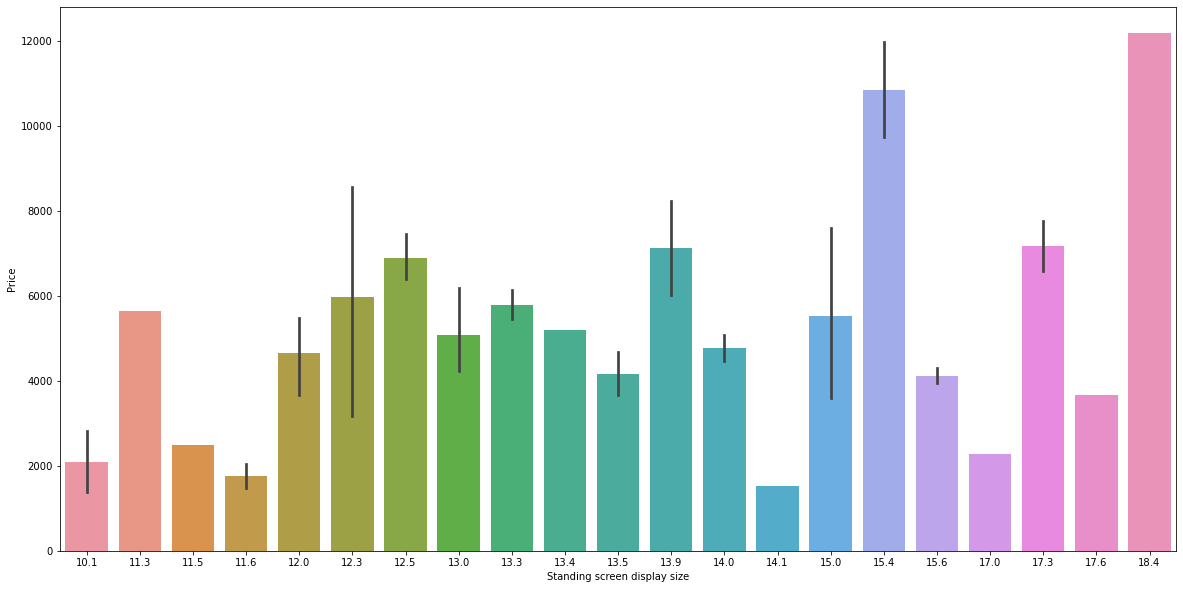

In [24]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Standing screen display size',y='Price',data=df)

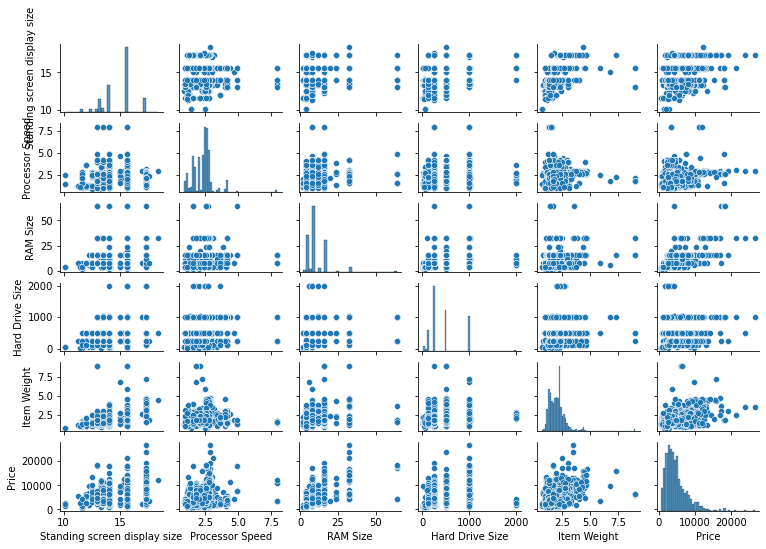

In [25]:
sns.pairplot(df, height=1.2, aspect=1.5);

In [26]:
mean_Brand_Price=round(df.groupby('Brand').mean())\
.sort_values('Price',ascending=False)\
.reset_index()

mean_Brand_Price.head()

,Brand,Standing screen display size,Processor Speed,Item Weight,Price
0,Razer,15.0,3.0,2.0,14556.0
1,LG,15.0,2.0,1.0,9131.0
2,Oemgenuine,15.0,2.0,2.0,8726.0
3,MSI,16.0,3.0,3.0,7521.0
4,Google,12.0,1.0,1.0,7298.0


In [27]:
df.Brand.value_counts()

HP              417
Lenovo          409
Dell            292
Asus            251
Acer            101
MSI              54
Toshiba          48
Oemgenuine       29
Apple            21
Microsoft        12
Samsung           8
Mediacom          7
Razer             7
Xiaomi            4
Chuwi             3
Google            3
LG                3
Fujitsu           3
Vero              3
Huawei            2
SHOXLAB           2
LenovoLaptop      1
Basrdis           1
Name: Brand, dtype: int64

In [193]:
result.shape

(1469, 11)

C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


''

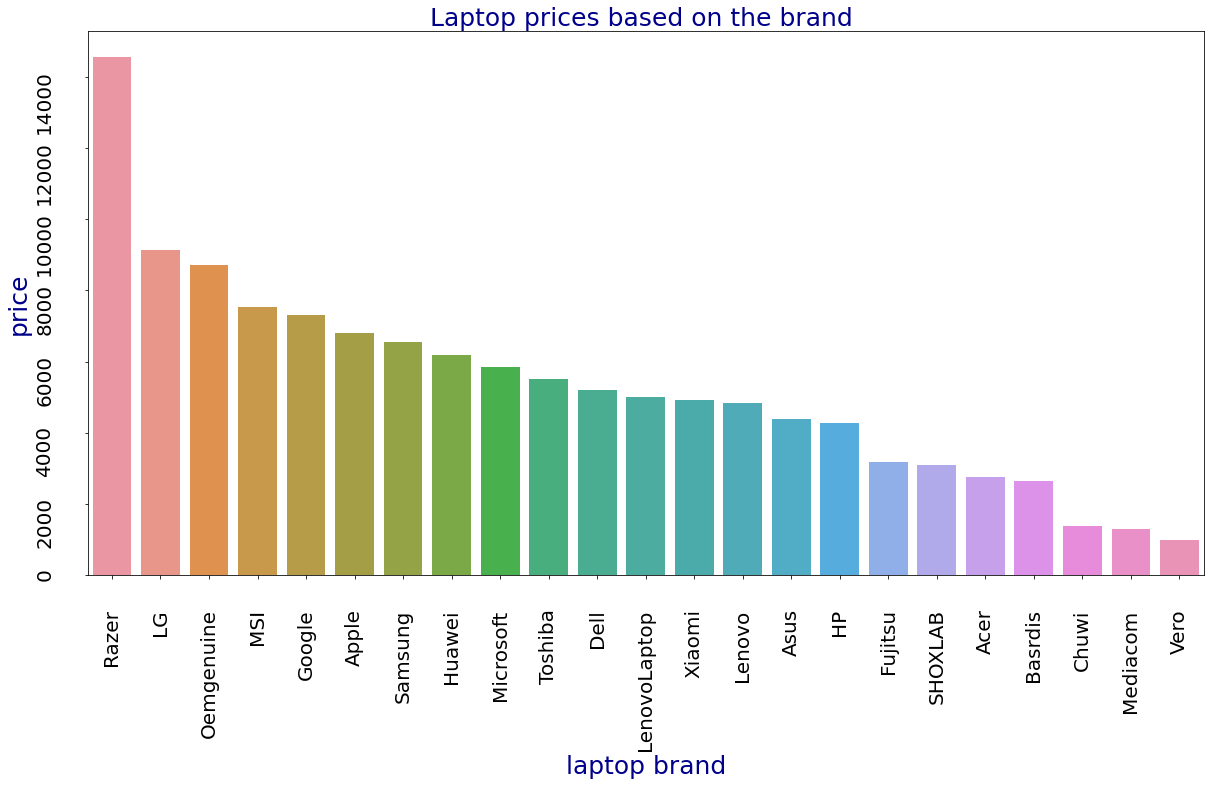

In [194]:
plt.subplots(figsize=(20,10))
bar1_plot=sns.barplot(mean_Brand_Price['Brand'],mean_Brand_Price['Price'])
bar1_plot.tick_params(pad=30,labelsize=20,rotation=90)
bar1_plot.set_xlabel('laptop brand',size=25,c='darkblue')
bar1_plot.set_ylabel('price',size=25,c='darkblue')
bar1_plot.set_title('Laptop prices based on the brand ',size=25,c='darkblue')
;

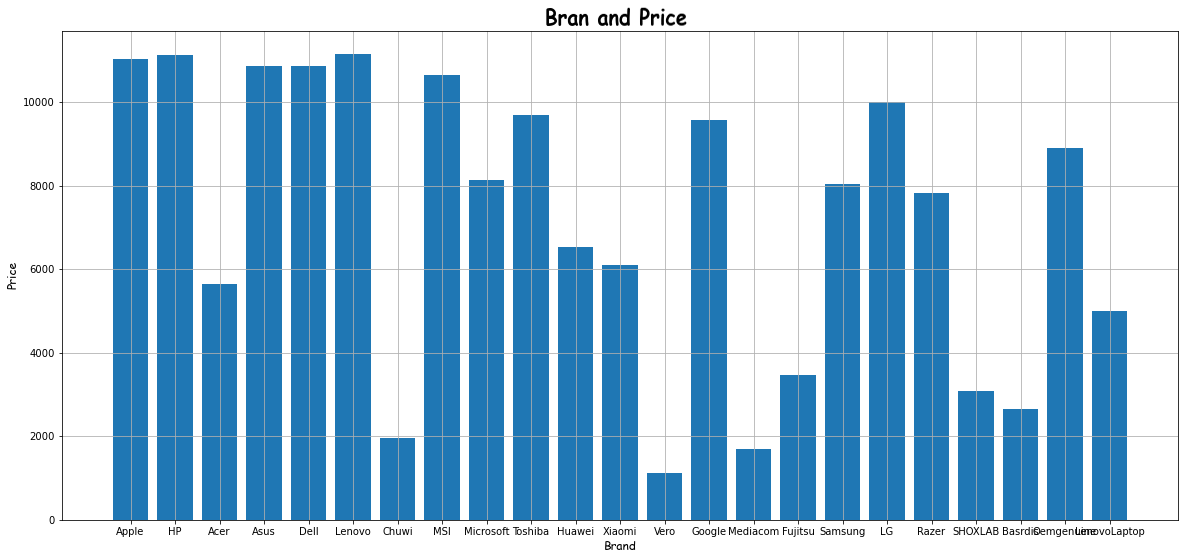

In [195]:
plt.figure(figsize=(20,9))
plt.bar(result.Brand,result.Price)
plt.xlabel('Brand',fontsize=12,family = 'fantasy')
plt.ylabel('Price',fontsize=12,family = 'fantasy')
plt.title('Bran and Price ',family = 'fantasy',fontsize=20,weight='bold',rotation=0.17)
plt.grid()

* _Visualizing the relationship between target variable and features_

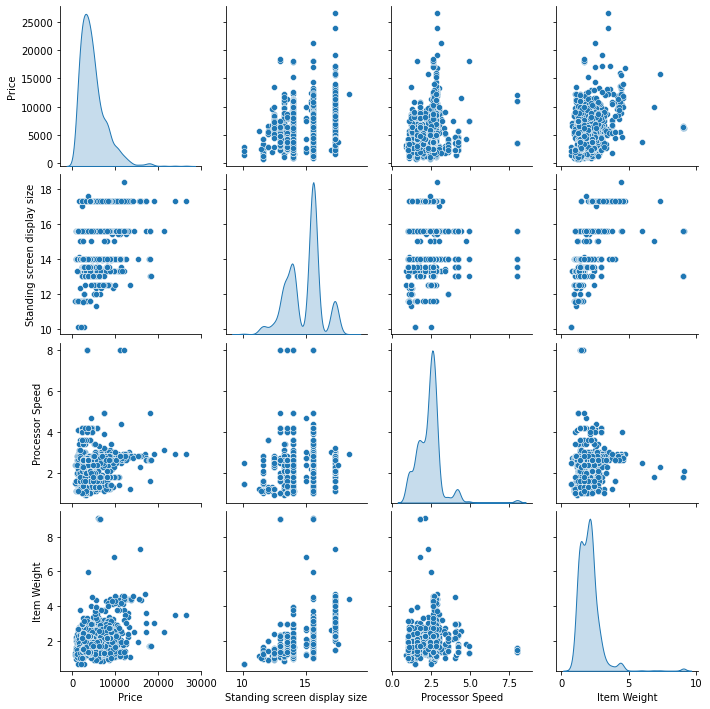

In [28]:
subset1=df[[ 'Price', 'Standing screen display size', 'Processor Speed', 'Item Weight', 'Brand', 'Operating System']]

sns.pairplot(subset1, diag_kind='kde')
plt.show();

In [197]:
df.corr()

,Standing screen display size,Processor Speed,Item Weight,Price
Standing screen display size,1.000000,0.089059,0.543228,0.085620
Processor Speed,0.089059,1.000000,0.071590,0.214319
Item Weight,0.543228,0.071590,1.000000,0.179023
Price,0.085620,0.214319,0.179023,1.000000


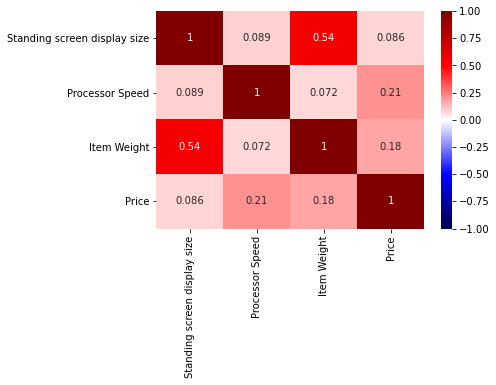

In [29]:
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [30]:
df['Hard Disk Description'].value_counts()

SSD             1187
HDD              372
FlashStorage      68
Emmc              19
SSHD              18
Hybrid             8
Flashmemory        4
HybridDrive        4
SATA               1
Name: Hard Disk Description, dtype: int64

In [35]:
df.columns

Index(['Brand', 'Standing screen display size', 'Processor Brand',
       'Processor Speed', 'RAM Size', 'Hard Drive Size',
       'Hard Disk Description', 'Graphics Chipset Brand', 'Operating System',
       'Item Weight', 'Price'],
      dtype='object')

In [34]:
df.to_csv("clean_data_.csv")